In [3]:
!pip install google.colab


ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for google.colab


In [5]:
import pandas as pd
import random
import uuid
from faker import Faker
from datetime import datetime, timedelta
from google.colab import files

# --- Faker setup ---
fake = Faker('en_US')  # English content
Faker.seed(42)
random.seed(42)

# --- Tunisian names ---
tunisian_first_names = [
    "Ahmed", "Mohamed", "Aymen", "Khalil", "Omar", "Mehdi", "Youssef", "Rami",
    "Karim", "Anis", "Marwen", "Houssem", "Nizar", "Slim", "Imen", "Nadia",
    "Sarra", "Ons", "Meriem", "Rania", "Amina", "Hajer", "Leila", "Mouna", "Ines"
]

tunisian_last_names = [
    "Ben Ali", "Trabelsi", "Ben Salah", "Chaouch", "Gharbi", "Ben Amor", "Zayani",
    "Ben Youssef", "Bouazizi", "Ayari", "Mansouri", "Bouhlel", "Khelifi", "Jebali",
    "Hammami", "Ben Jemaa", "Sassi", "Chammakhi", "Masmoudi", "Saidi"
]

# --- Currencies for Tunisia ---
currencies = ['TND', 'USD', 'EUR', 'GBP', 'JPY', 'CAD', 'AUD']

# --- Helper to generate Tunisian phone numbers ---
def tunisian_phone():
    return "+216" + str(random.randint(20000000, 99999999))

# --- Generate BureauDeChange data ---
bureaux = []
for _ in range(300):
    bureaux.append({
        "BureauID": str(uuid.uuid4()),
        "BureauName": fake.company(),
        "BureauAddress": fake.street_address() + ", Tunis, Tunisia",
        "BureauPhone": tunisian_phone()
    })

# --- Generate Clients data ---
clients = []
for _ in range(700):
    clients.append({
        "ClientID": str(uuid.uuid4()),
        "FirstName": random.choice(tunisian_first_names),
        "LastName": random.choice(tunisian_last_names),
        "ClientPhone": tunisian_phone(),
        "ClientEmail": fake.email(),
        "ClientAddress": fake.street_address() + ", Tunis, Tunisia"
    })

# --- Generate Transactions data ---
transactions = []
for _ in range(2000):
    client = random.choice(clients)
    bureau = random.choice(bureaux)

    # Ensure one currency is always TND
    if random.choice([True, False]):
        currency_from = 'TND'
        currency_to = random.choice([c for c in currencies if c != 'TND'])
    else:
        currency_to = 'TND'
        currency_from = random.choice([c for c in currencies if c != 'TND'])

    transactions.append({
        "TransactionID": str(uuid.uuid4()),
        "ClientID": client["ClientID"],
        "BureauID": bureau["BureauID"],
        "CurrencyFrom": currency_from,
        "CurrencyTo": currency_to,
        "Amount": round(random.uniform(100, 5000), 2),
        "Date": (datetime.now() - timedelta(days=random.randint(0, 365))).strftime("%Y-%m-%d")
    })

# --- Convert to DataFrames ---
df_clients = pd.DataFrame(clients)
df_bureaux = pd.DataFrame(bureaux)
df_transactions = pd.DataFrame(transactions)

# --- Merge all data into one CSV ---
df_merged = df_transactions.merge(df_clients, on="ClientID", how="left")
df_merged = df_merged.merge(df_bureaux, on="BureauID", how="left")

# --- Save and download ---
df_merged.to_csv("merged_dataset.csv", index=False)
files.download("merged_dataset.csv")


ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score
import joblib

In [ ]:
# 1. Load dataset
# --------------------------
file_path = "merged_dataset.csv"
df = pd.read_csv(file_path)
print(df.columns.tolist())          #Transforme les colonnes en liste Python.  


['TransactionID', 'ClientID', 'BureauID', 'CurrencyFrom', 'CurrencyTo', 'Amount', 'Date', 'FirstName', 'LastName', 'ClientPhone', 'ClientEmail', 'ClientAddress', 'BureauName', 'BureauAddress', 'BureauPhone']



Data Overview:
                          TransactionID                              ClientID  \
0  fe15df68-7818-4071-979c-a3913d3d839e  0557466d-d5b7-4c92-b3b3-61d9679fb87b   
1  9704c695-d1e4-474e-b578-a24794dd90be  bb8b655c-cbdf-4225-8cb4-23f7eba17081   
2  925b71de-8a05-4753-b5de-df27b2788898  934774d3-a779-4620-ba18-f0ddc4bfa1e3   
3  2cf95457-28d2-41c3-a891-dbfb035ce189  b6a1e1d6-c38c-4600-a0bd-fb3d89f0cff1   
4  6425746a-8a37-4baa-ba35-322c7baae7be  3fbbb906-8acc-4074-92bc-53fedc1717b5   

                               BureauID CurrencyFrom CurrencyTo   Amount  \
0  f3708443-ae3d-4e43-8d3a-fb23fc6f170f          GBP        TND  2882.13   
1  ac6441b7-9088-42c2-ae45-c8cbeb7e8d90          CAD        TND  1706.84   
2  a8ab81f3-90d2-4684-9e5d-994ee7e44957          TND        EUR  2439.53   
3  4102544c-75c0-4b29-bc3e-b7a49ce03828          EUR        TND  2289.00   
4  373b7b6b-8d70-42b1-b030-4bf6d17c0179          TND        GBP  3303.05   

         Date FirstName   LastName  Clie

Text(0.5, 1.0, 'Destination Currency Counts')

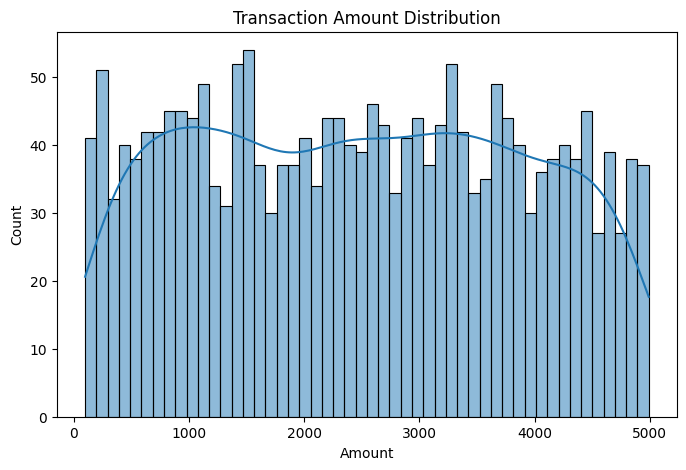

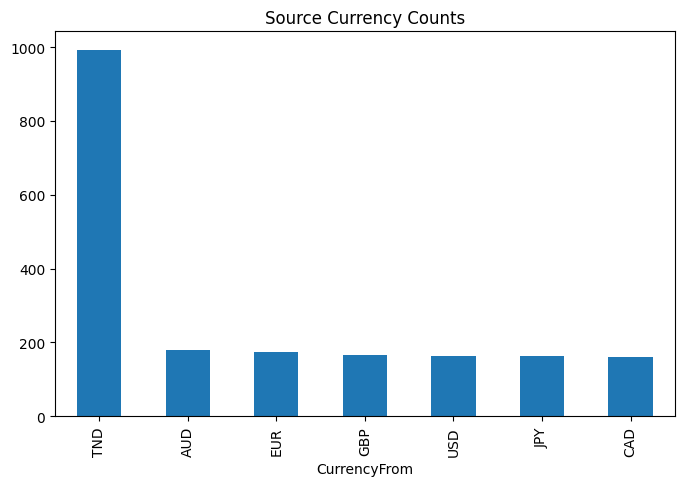

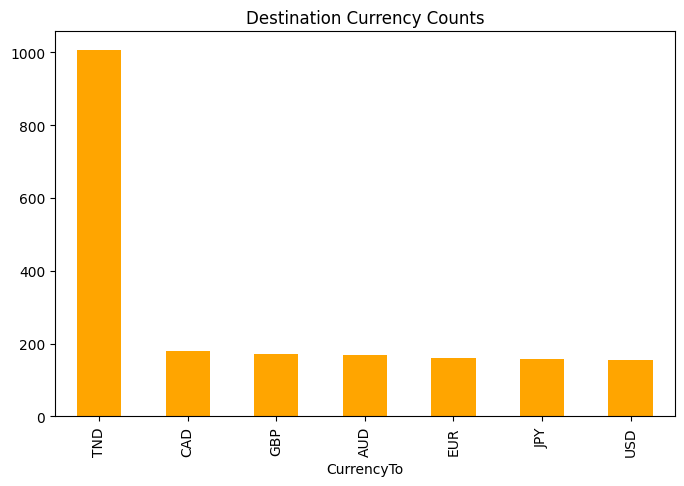

In [ ]:
print("\nData Overview:")     #Affiche les 5 premières lignes (ou moins si le DataFrame est petit).
print(df.head())
print("\nDataset Info:")      #Donne types des colonnes, nombre de valeurs non-null, mémoire utilisée.
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())      #Indique combien de valeurs manquantes (NaN) par colonne.
print("\nBasic Statistics:\n", df.describe())        #Statistiques descriptives pour les colonnes numériques : moyenne, écart-type, quartiles, min, max.

# Convert date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# --- Plot distributions ---
plt.figure(figsize=(8, 5))                       # figure: crée un nouveau graphique de taille 8x5 pouces.
sns.histplot(df['Amount'], bins=50, kde=True)    # histplot: crée un histogramme 
# df['Amount'] → colonne des montants de transactions.
# bins=50 → découpe les montants en 50 intervalles.
# kde=True → ajoute une courbe lisse qui montre la distribution générale.
plt.title("Transaction Amount Distribution")

plt.figure(figsize=(8, 5))
df['CurrencyFrom'].value_counts().plot(kind='bar')
plt.title("Source Currency Counts")

plt.figure(figsize=(8, 5))
df['CurrencyTo'].value_counts().plot(kind='bar', color='orange')
plt.title("Destination Currency Counts")


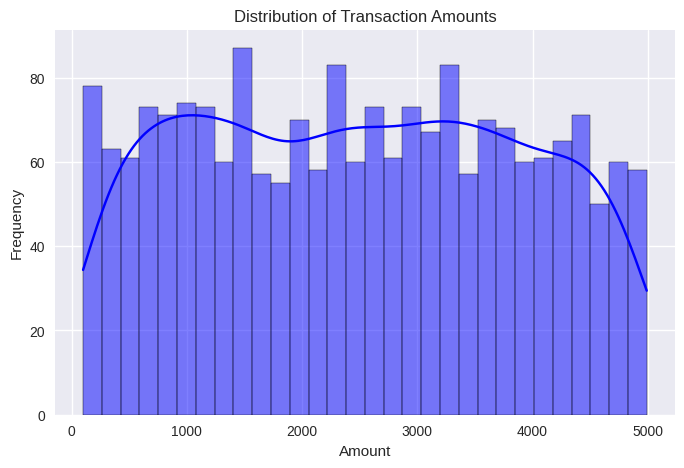

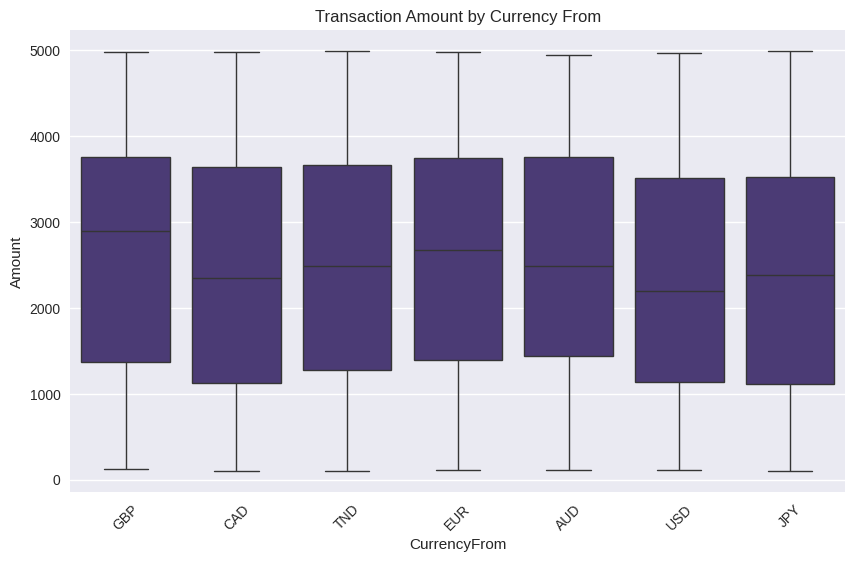

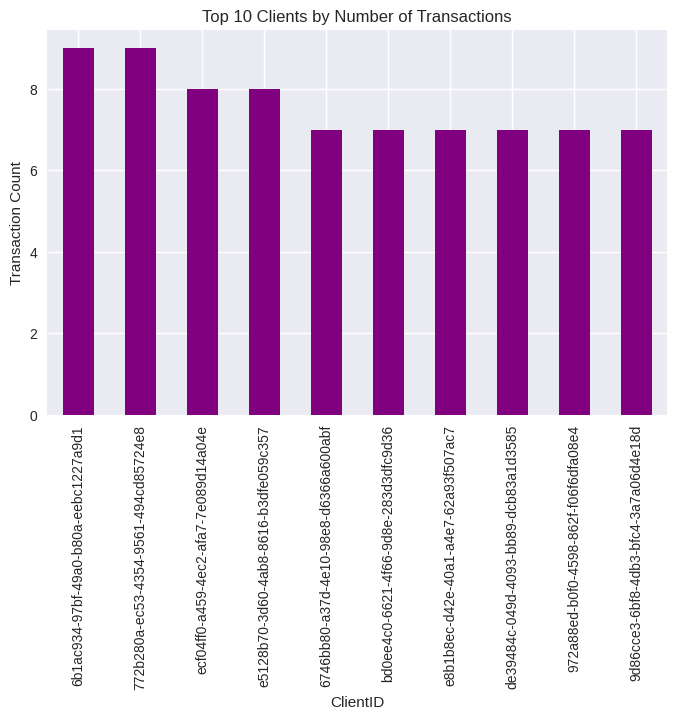

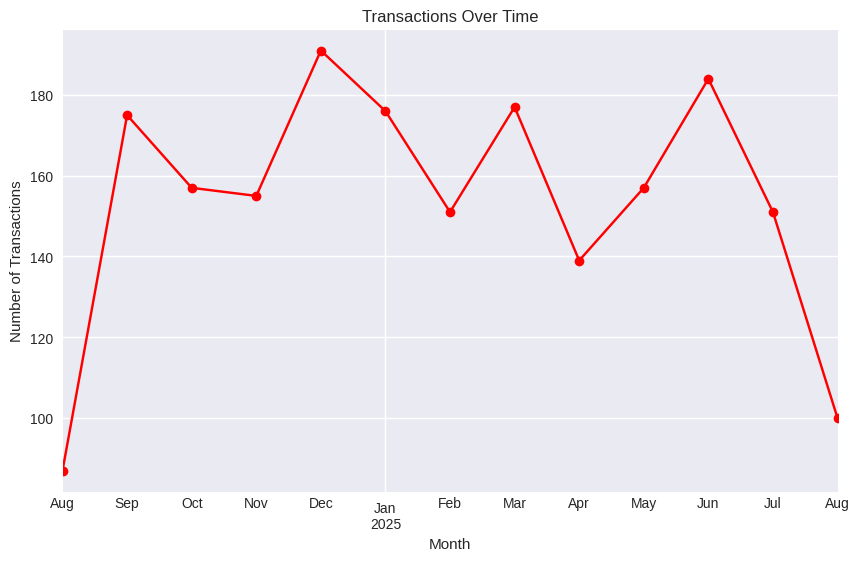


💡 Average Transaction Amount per Client:
ClientID
18696cac-b80d-4598-951c-65827e8df732    4984.400
ebc4cd05-da53-4166-9ceb-eade523eeee5    4960.860
b9b09f2d-d338-4d71-8fb1-2c7140acd164    4902.230
0dabbbc2-d04c-4262-9821-3ca832b9fb86    4855.550
b0008e25-caaa-46f4-b523-54ca67fe7c6d    4819.540
3b4a3c2d-bbaf-46e7-9dd1-cb788235c5ef    4812.100
9bd233bf-b55c-4790-b9f8-196231f8d786    4735.870
60371659-1b51-496f-904c-49d5c0d26139    4676.320
c06b419d-06da-4bd6-84d1-1bf7af53a67a    4659.850
a7dc71e1-ea1f-4782-8fa7-7a2193dee8ad    4641.225
Name: Amount, dtype: float64

💡 Total Transaction Amount per Bureau:
BureauName
Phillips LLC                   46075.54
Molina-Castaneda               35032.10
Contreras Group                34675.87
Gentry PLC                     32743.86
Simmons, Murray and Salinas    32698.36
Mack Ltd                       32657.21
Powell-Sanford                 32044.62
Marshall LLC                   31809.83
White-James                    30553.06
Spencer-Carlson    

In [ ]:
# --- Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")


# --- PLOTS ---

# 1. Transaction Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=30, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# 4. Amount by Currency From (Boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='CurrencyFrom', y='Amount')
plt.title("Transaction Amount by Currency From")
plt.xticks(rotation=45)
plt.show()

# 5. Top Clients by Number of Transactions
top_clients = df['ClientID'].value_counts().head(10)
plt.figure(figsize=(8,5))
top_clients.plot(kind='bar', color='purple')
plt.title("Top 10 Clients by Number of Transactions")
plt.xlabel("ClientID")
plt.ylabel("Transaction Count")
plt.show()

# 6. Transactions Over Time
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
transactions_per_month = df.groupby(df['Date'].dt.to_period('M')).size()

plt.figure(figsize=(10,6))
transactions_per_month.plot(kind='line', marker='o', color='red')
plt.title("Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

# --- EXTRA STATISTICS FOR CRM ---
print("\n💡 Average Transaction Amount per Client:")
print(df.groupby('ClientID')['Amount'].mean().sort_values(ascending=False).head(10))

print("\n💡 Total Transaction Amount per Bureau:")
print(df.groupby('BureauName')['Amount'].sum().sort_values(ascending=False).head(10))

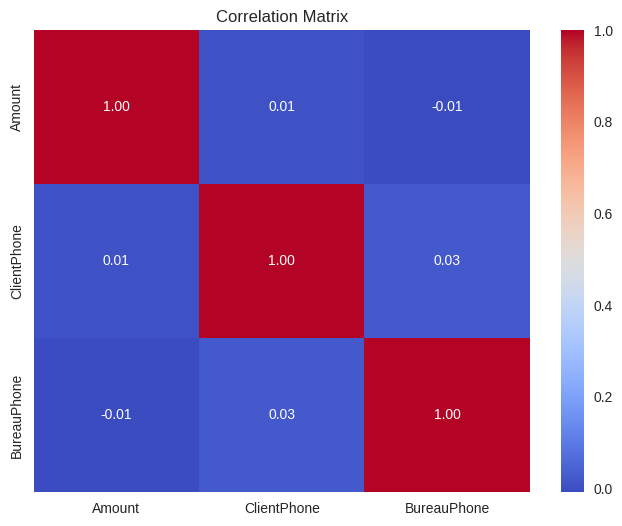

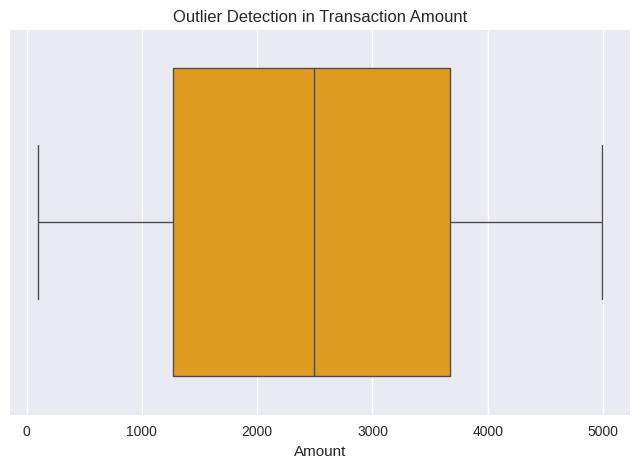

⚠ Found 0 outliers in 'Amount' (Z-score > 3):
Empty DataFrame
Columns: [TransactionID, ClientID, Amount]
Index: []


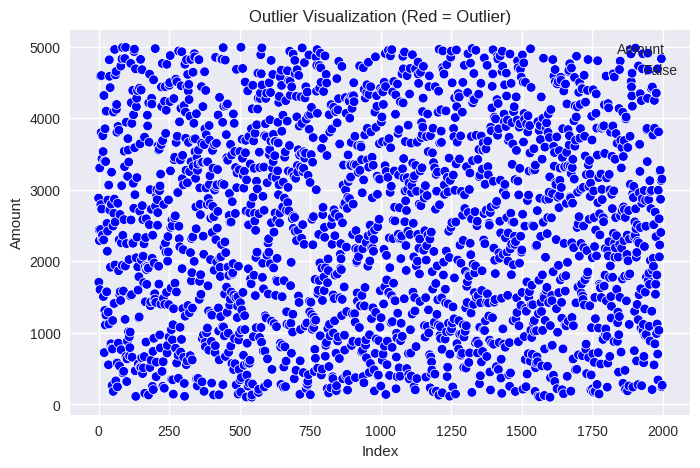

In [ ]:
# --- CORRELATION MATRIX ---
plt.figure(figsize=(8,6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# --- OUTLIER DETECTION: Boxplot ---
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Amount'], color='orange')
plt.title("Outlier Detection in Transaction Amount")
plt.show()

# --- OUTLIER DETECTION: Z-Score Method ---
# Calculate z-scores
z_scores = np.abs((df['Amount'] - df['Amount'].mean()) / df['Amount'].std())

# Define threshold for outliers
threshold = 3
outliers = df[z_scores > threshold]

print(f"⚠ Found {outliers.shape[0]} outliers in 'Amount' (Z-score > {threshold}):")
print(outliers[['TransactionID', 'ClientID', 'Amount']])

# --- OPTIONAL: Visualize Outliers on Scatterplot ---
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.index, y=df['Amount'], hue=z_scores > threshold, palette={True:'red', False:'blue'})
plt.title("Outlier Visualization (Red = Outlier)")
plt.xlabel("Index")
plt.ylabel("Amount")
plt.show()

In [ ]:
# 4. Data Cleaning
# --------------------------
# Remove duplicates
df.drop_duplicates(inplace=True)

# Remove negative or zero amounts
df = df[df['Amount'] > 0]

# Rule: One of CurrencyFrom or CurrencyTo must be TND
df = df[(df['CurrencyFrom'] == 'TND') | (df['CurrencyTo'] == 'TND')]

# Drop rows with missing critical values
df.dropna(subset=['ClientID', 'Amount', 'Date'], inplace=True)

In [ ]:
import pandas as pd
import numpy as np

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# --------------------------
# 1. RFM features
# --------------------------
current_date = df['Date'].max()
rfm = df.groupby('ClientID').agg({
    'Date': lambda x: (current_date - x.max()).days,       # Recency
    'TransactionID': 'count',                              # Frequency
    'Amount': 'sum'                                        # Monetary
}).reset_index()

rfm.columns = ['ClientID', 'Recency', 'Frequency', 'Monetary']

# --------------------------
# 2. Currency diversity
# --------------------------
currency_div = df.groupby('ClientID').agg({
    'CurrencyFrom': pd.Series.nunique,
    'CurrencyTo': pd.Series.nunique
}).reset_index()
currency_div.columns = ['ClientID', 'UniqueSourceCurrencies', 'UniqueDestCurrencies']

# --------------------------
# 3. Extra features
# --------------------------
extra_feats = df.groupby('ClientID').agg({
    'Amount': ['mean', 'std'],  # Avg and StdDev transaction amount
    'Date': lambda x: (current_date - x.min()).days,  # Days since first transaction
    'CurrencyFrom': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'CurrencyTo': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

extra_feats.columns = [
    'ClientID',
    'AvgTransactionAmount',
    'TransactionStdDev',
    'FirstTransactionDaysAgo',
    'MostUsedSourceCurrency',
    'MostUsedDestCurrency'
]

# --------------------------
# 4. Merge all features
# --------------------------
client_features = rfm.merge(currency_div, on='ClientID') \
                     .merge(extra_feats, on='ClientID')

# --------------------------
# 5. Segmentation
# --------------------------
median_monetary = client_features['Monetary'].median()
client_features['Segment'] = np.where(client_features['Monetary'] > median_monetary, 'HighValue', 'LowValue')

# --------------------------
# 6. Display
# --------------------------
print(client_features.head())

# --------------------------
# 7. Save to CSV
# --------------------------
client_features.to_csv("client_360_profile.csv", index=False)
print("✅ Client 360° profile saved as client_360_profile.csv")


                               ClientID  Recency  Frequency  Monetary  \
0  007d4230-9df3-4d50-8a9b-540a59758495      245          1   1447.26   
1  01eaa3b0-5516-4861-bcea-d5ff6ab9f254      151          2   2819.83   
2  0235fd33-1021-4827-9298-d402a0166def      176          2   2969.68   
3  029d1458-cdc2-4efa-9ec7-d90b96e4d0c6       22          6  18247.91   
4  02a74b04-4f4d-498b-9b86-a320d2d14897      242          2   4086.97   

   UniqueSourceCurrencies  UniqueDestCurrencies  AvgTransactionAmount  \
0                       1                     1           1447.260000   
1                       1                     2           1409.915000   
2                       2                     1           1484.840000   
3                       2                     5           3041.318333   
4                       1                     2           2043.485000   

   TransactionStdDev  FirstTransactionDaysAgo MostUsedSourceCurrency  \
0                NaN                      245     

In [ ]:
client_features = pd.read_csv("client_360_profile.csv")

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import (
    classification_report, confusion_matrix,
    mean_absolute_error, r2_score
)
# --------------------------
# CLASSIFICATION PIPELINE
# --------------------------
CORR_THRESHOLD = 0.6  # drop features with |corr| > this
RANDOM_STATE = 42
# Encode target
le_segment = LabelEncoder()
client_features['SegmentEncoded'] = le_segment.fit_transform(client_features['Segment'])

# Prepare X and y
X_cls = client_features.drop(['ClientID', 'Segment', 'SegmentEncoded'], axis=1)
y_cls = client_features['SegmentEncoded']

# Convert datetime columns to numeric days
for col in X_cls.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns:
    X_cls[col] = (X_cls[col] - X_cls[col].min()).dt.days

# Try parsing object columns to datetime if possible
for col in X_cls.select_dtypes(include=['object']).columns:
    try:
        temp = pd.to_datetime(X_cls[col])
        X_cls[col] = (temp - temp.min()).dt.days
    except (ValueError, TypeError):
        pass

# Encode remaining categorical features
label_encoders_cls = {}
for col in X_cls.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_cls[col] = le.fit_transform(X_cls[col].astype(str))
    label_encoders_cls[col] = le

# Drop leakage-prone features
corr_with_target = pd.DataFrame(X_cls).assign(SegmentEncoded=y_cls).corr()['SegmentEncoded']
leakage_feats = corr_with_target[abs(corr_with_target) > CORR_THRESHOLD].index.tolist()
leakage_feats = [f for f in leakage_feats if f != 'SegmentEncoded']
print(f"\n🚫 Dropping leakage features: {leakage_feats}")
X_cls.drop(columns=leakage_feats, inplace=True)

# Scale numeric features
scaler_cls = StandardScaler()
X_cls_scaled = scaler_cls.fit_transform(X_cls)

# Cross-validation
clf = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=200,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt'
)
cv_scores = cross_val_score(clf, X_cls_scaled, y_cls, cv=5, scoring='accuracy')
print("\n📊 CV Accuracy after leakage removal:", np.mean(cv_scores))

# Train/test split and model fit
X_train, X_test, y_train, y_test = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=RANDOM_STATE)
clf.fit(X_train, y_train)
y_pred_cls = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_cls))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cls))

# --------------------------
# REGRESSION PIPELINE
# --------------------------
df['clientSegment'] = df['ClientID'].map(dict(zip(client_features['ClientID'], client_features['SegmentEncoded'])))
X_reg = df.drop(['Amount'], axis=1)
y_reg = df['Amount']

# Convert datetime columns to numeric
for col in X_reg.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns:
    X_reg[col] = (X_reg[col] - X_reg[col].min()).dt.days

# Try parsing object columns to datetime if possible
for col in X_reg.select_dtypes(include=['object']).columns:
    try:
        temp = pd.to_datetime(X_reg[col])
        X_reg[col] = (temp - temp.min()).dt.days
    except (ValueError, TypeError):
        pass

# Encode remaining categorical features
label_encoders_reg = {}
for col in X_reg.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_reg[col] = le.fit_transform(X_reg[col].astype(str))
    label_encoders_reg[col] = le

# Train/test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=RANDOM_STATE)

# Train model
reg = GradientBoostingRegressor(random_state=RANDOM_STATE)
reg.fit(X_train_r, y_train_r)
y_pred_reg = reg.predict(X_test_r)

print("\nRegression MAE:", mean_absolute_error(y_test_r, y_pred_reg))
print("Regression R²:", r2_score(y_test_r, y_pred_reg))


🚫 Dropping leakage features: ['Frequency', 'Monetary']


/tmp/ipython-input-2106292209.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(X_cls[col])
/tmp/ipython-input-2106292209.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(X_cls[col])



📊 CV Accuracy after leakage removal: 0.9077922077922077

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        68
           1       0.90      0.86      0.88        65

    accuracy                           0.89       133
   macro avg       0.89      0.89      0.89       133
weighted avg       0.89      0.89      0.89       133


Confusion Matrix:
 [[62  6]
 [ 9 56]]


/tmp/ipython-input-2106292209.py:86: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(X_reg[col])
/tmp/ipython-input-2106292209.py:86: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(X_reg[col])
/tmp/ipython-input-2106292209.py:86: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.to_datetime(X_reg[col])
/tmp/ipython-input-2106292209.py:86: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp =


Regression MAE: 1148.608358512257
Regression R²: 0.015033065379999933


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models wrapped with imputation
classifiers = {
    "KNN": make_pipeline(SimpleImputer(strategy='mean'), KNeighborsClassifier(n_neighbors=5)),
    "SVM": make_pipeline(SimpleImputer(strategy='mean'), SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE)),
    "Random Forest": make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(
        random_state=RANDOM_STATE, n_estimators=200, max_depth=6,
        min_samples_split=10, min_samples_leaf=4, max_features='sqrt')),
    "XGBoost": make_pipeline(SimpleImputer(strategy='mean'), XGBClassifier(
        use_label_encoder=False, eval_metric='mlogloss', random_state=RANDOM_STATE))
}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\n🔍 CLASSIFICATION RESULTS")
for name, clf in classifiers.items():
    print(f"\n▶️ {name}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("   Accuracy:", accuracy_score(y_test, y_pred))
    print("   Classification Report:\n", classification_report(y_test, y_pred))
    print("   Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔍 CLASSIFICATION RESULTS

▶️ KNN
   Accuracy: 0.8872180451127819
   Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        68
           1       0.90      0.86      0.88        65

    accuracy                           0.89       133
   macro avg       0.89      0.89      0.89       133
weighted avg       0.89      0.89      0.89       133

   Confusion Matrix:
 [[62  6]
 [ 9 56]]

▶️ SVM
   Accuracy: 0.8796992481203008
   Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89        68
           1       0.90      0.85      0.87        65

    accuracy                           0.88       133
   macro avg       0.88      0.88      0.88       133
weighted avg       0.88      0.88      0.88       133

   Confusion Matrix:
 [[62  6]
 [10 55]]

▶️ Random Forest
   Accuracy: 0.9022556390977443
   Classification Report:
               precision    

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:11:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   Accuracy: 0.9097744360902256
   Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.92      0.89      0.91        65

    accuracy                           0.91       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.91      0.91      0.91       133

   Confusion Matrix:
 [[63  5]
 [ 7 58]]



🔍 CLASSIFICATION RESULTS

▶️ KNN
   Accuracy: 0.8872180451127819
   Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        68
           1       0.90      0.86      0.88        65

    accuracy                           0.89       133
   macro avg       0.89      0.89      0.89       133
weighted avg       0.89      0.89      0.89       133

   Confusion Matrix:
 [[62  6]
 [ 9 56]]

▶️ SVM
   Accuracy: 0.8796992481203008
   Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89        68
           1       0.90      0.85      0.87        65

    accuracy                           0.88       133
   macro avg       0.88      0.88      0.88       133
weighted avg       0.88      0.88      0.88       133

   Confusion Matrix:
 [[62  6]
 [10 55]]

▶️ Random Forest
   Accuracy: 0.9022556390977443
   Classification Report:
               precision    

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:11:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


   Accuracy: 0.9097744360902256
   Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.92      0.89      0.91        65

    accuracy                           0.91       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.91      0.91      0.91       133

   Confusion Matrix:
 [[63  5]
 [ 7 58]]


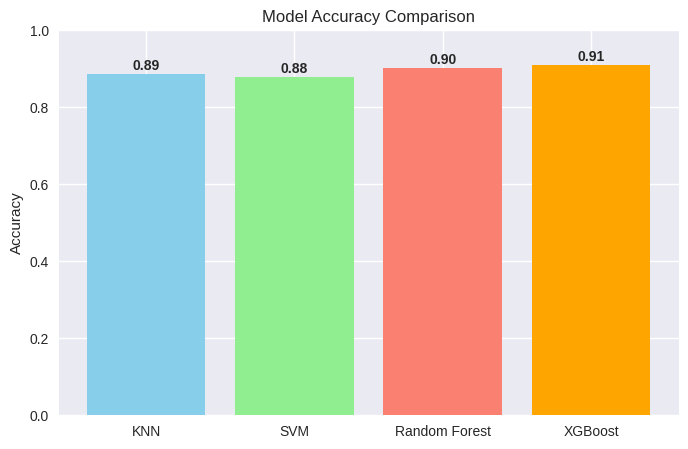

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Store results
results = {}

print("\n🔍 CLASSIFICATION RESULTS")
for name, clf in classifiers.items():
    print(f"\n▶️ {name}")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("   Accuracy:", acc)
    print("   Classification Report:\n", classification_report(y_test, y_pred))
    print("   Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plotting accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # accuracy is between 0 and 1
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


In [ ]:
import pickle

# Save model, scaler, label encoder, and features
model_data = {
    'model': classifiers['XGBoost'],  # your trained XGBoost pipeline
    'scaler': scaler_cls,
    'label_encoder': le_segment,
    'features': X_cls.columns.tolist()
}

with open("xgb_client_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("✅ XGBoost model saved as xgb_client_model.pkl")


✅ XGBoost model saved as xgb_client_model.pkl


In [ ]:
# --------------------------
# LIBRARIES
# --------------------------
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# --------------------------
# 1. LOAD DATA
# --------------------------
file_path = "client_360_profile.csv"
df = pd.read_csv(file_path)

# Encode target
le_segment = LabelEncoder()
df['SegmentEncoded'] = le_segment.fit_transform(df['Segment'])

# --------------------------
# 2. FEATURES & TARGET
# --------------------------
feature_cols = [
    'Recency', 'Frequency', 'Monetary',
    'UniqueSourceCurrencies', 'UniqueDestCurrencies',
    'AvgTransactionAmount', 'TransactionStdDev', 'FirstTransactionDaysAgo',
    'MostUsedSourceCurrency', 'MostUsedDestCurrency'
]
X = df[feature_cols].copy()
y = df['SegmentEncoded']

# --------------------------
# 3. ENCODE CATEGORICAL FEATURES
# --------------------------
categorical_cols = ['MostUsedSourceCurrency', 'MostUsedDestCurrency']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# --------------------------
# 4. SCALE NUMERIC FEATURES
# --------------------------
numeric_cols = [c for c in X.columns if c not in categorical_cols]
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# --------------------------
# 5. TRAIN/TEST SPLIT
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------
# 6. CONVERT TO DMATRIX
# --------------------------
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test, label=y_test)

# --------------------------
# 7. TRAIN XGBOOST MODEL
# --------------------------
params = {
    'max_depth': 4,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y)),
    'eval_metric': 'mlogloss',
    'alpha': 0.1,
    'lambda': 1,
    'seed': 42
}

evallist = [(dtrain, 'train'), (dtest, 'eval')]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=evallist,
    early_stopping_rounds=20,
    verbose_eval=True
)

# --------------------------
# 8. EVALUATION
# --------------------------
y_pred = bst.predict(dtest)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --------------------------
# 9. SAVE MODEL
# --------------------------
joblib.dump({
    'model': bst,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_cols': feature_cols,
    'le_segment': le_segment
}, "xgb_client_model.pkl")

print("✅ Model trained and saved as xgb_client_model.pkl")


[0]	train-mlogloss:0.64508	eval-mlogloss:0.64526
[1]	train-mlogloss:0.60154	eval-mlogloss:0.60224
[2]	train-mlogloss:0.56195	eval-mlogloss:0.56297
[3]	train-mlogloss:0.52575	eval-mlogloss:0.52725
[4]	train-mlogloss:0.49265	eval-mlogloss:0.49427
[5]	train-mlogloss:0.46377	eval-mlogloss:0.46687
[6]	train-mlogloss:0.43641	eval-mlogloss:0.43986
[7]	train-mlogloss:0.41085	eval-mlogloss:0.41530
[8]	train-mlogloss:0.38659	eval-mlogloss:0.39083
[9]	train-mlogloss:0.36404	eval-mlogloss:0.36792
[10]	train-mlogloss:0.34302	eval-mlogloss:0.34691
[11]	train-mlogloss:0.32409	eval-mlogloss:0.32889
[12]	train-mlogloss:0.30897	eval-mlogloss:0.31414
[13]	train-mlogloss:0.29464	eval-mlogloss:0.30048
[14]	train-mlogloss:0.27833	eval-mlogloss:0.28423
[15]	train-mlogloss:0.26308	eval-mlogloss:0.26873
[16]	train-mlogloss:0.25185	eval-mlogloss:0.25764
[17]	train-mlogloss:0.23827	eval-mlogloss:0.24384
[18]	train-mlogloss:0.22559	eval-mlogloss:0.23093
[19]	train-mlogloss:0.21857	eval-mlogloss:0.22456
[20]	train

In [ ]:
# --------------------------
# LIBRARIES
# --------------------------
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb

# --------------------------
# 1. LOAD SAVED MODEL AND PREPROCESSING OBJECTS
# --------------------------
model_dict = joblib.load("xgb_client_model.pkl")
bst = model_dict['model']
scaler = model_dict['scaler']
label_encoders = model_dict['label_encoders']
feature_cols = model_dict['feature_cols']
le_segment = model_dict['le_segment']

# --------------------------
# 2. LOAD NEW DATA
# --------------------------
new_data_path = "client_360_profile.csv"  # Replace with your new data file path
new_df = pd.read_csv(new_data_path)

# Ensure all required feature columns are present
missing_cols = [col for col in feature_cols if col not in new_df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in new data: {missing_cols}")

# Select only the required features
X_new = new_df[feature_cols].copy()

# --------------------------
# 3. ENCODE CATEGORICAL FEATURES
# --------------------------
categorical_cols = ['MostUsedSourceCurrency', 'MostUsedDestCurrency']
for col in categorical_cols:
    if col in label_encoders:
        le = label_encoders[col]
        # Handle unseen categories by mapping to a default value (e.g., most frequent category)
        X_new[col] = X_new[col].astype(str).map(
            lambda x: x if x in le.classes_ else le.classes_[0]
        )
        X_new[col] = le.transform(X_new[col].astype(str))

# --------------------------
# 4. SCALE NUMERIC FEATURES
# --------------------------
numeric_cols = [c for c in X_new.columns if c not in categorical_cols]
X_new[numeric_cols] = scaler.transform(X_new[numeric_cols])

# --------------------------
# 5. CONVERT TO DMATRIX
# --------------------------
dnew = xgb.DMatrix(X_new)

# --------------------------
# 6. MAKE PREDICTIONS
# --------------------------
y_pred_encoded = bst.predict(dnew)
y_pred_segment = le_segment.inverse_transform(y_pred_encoded.astype(int))

# --------------------------
# 7. SAVE PREDICTIONS
# --------------------------
output_df = new_df.copy()
output_df['PredictedSegment'] = y_pred_segment
output_df.to_csv("client_segment_predictions.csv", index=False)

print("✅ Predictions completed and saved to client_segment_predictions.csv")

✅ Predictions completed and saved to client_segment_predictions.csv


In [ ]:


import pandas as pd
import numpy as np
import joblib
import xgboost as xgb

# --------------------------
# 1. LOAD SAVED MODEL AND PREPROCESSING OBJECTS
# --------------------------
model_dict = joblib.load("xgb_client_model.pkl")
bst = model_dict['model']
scaler = model_dict['scaler']
label_encoders = model_dict['label_encoders']
feature_cols = model_dict['feature_cols']
le_segment = model_dict['le_segment']

# --------------------------
# 2. DEFINE NEW CLIENT DATA MANUALLY
# --------------------------
new_client = {
    'Recency': 1000,                      # Days since last transaction
    'Frequency': 70,                    # Number of transactions
    'Monetary': 2500,                   # Total transaction amount
    'UniqueSourceCurrencies': 2,        # Number of unique source currencies
    'UniqueDestCurrencies': 2,          # Number of unique destination currencies
    'AvgTransactionAmount': 150,        # Average transaction amount
    'TransactionStdDev': 30,            # Standard deviation of transactions
    'FirstTransactionDaysAgo': 200,     # Days since first transaction
    'MostUsedSourceCurrency': 'USD',    # Most used source currency
    'MostUsedDestCurrency': 'TND'       # Most used destination currency
}

# Convert to DataFrame
new_df = pd.DataFrame([new_client])

# Ensure all required feature columns are present
missing_cols = [col for col in feature_cols if col not in new_df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns in new data: {missing_cols}")

# Select only the required features
X_new = new_df[feature_cols].copy()

# --------------------------
# 3. ENCODE CATEGORICAL FEATURES
# --------------------------
categorical_cols = ['MostUsedSourceCurrency', 'MostUsedDestCurrency']
for col in categorical_cols:
    if col in label_encoders:
        le = label_encoders[col]
        # Handle unseen categories by mapping to the most frequent category
        X_new[col] = X_new[col].astype(str).map(
            lambda x: x if x in le.classes_ else le.classes_[0]
        )
        X_new[col] = le.transform(X_new[col].astype(str))

# --------------------------
# 4. SCALE NUMERIC FEATURES
# --------------------------
numeric_cols = [c for c in X_new.columns if c not in categorical_cols]
X_new[numeric_cols] = scaler.transform(X_new[numeric_cols])

# --------------------------
# 5. CONVERT TO DMATRIX
# --------------------------
dnew = xgb.DMatrix(X_new)

# --------------------------
# 6. MAKE PREDICTION
# --------------------------
y_pred_encoded = bst.predict(dnew)
y_pred_segment = le_segment.inverse_transform(y_pred_encoded.astype(int))

# --------------------------
# 7. OUTPUT RESULT
# --------------------------
print("New Client Data:")
print(new_df.to_string(index=False))
print("\nPredicted Segment:", y_pred_segment[0])

New Client Data:
 Recency  Frequency  Monetary  UniqueSourceCurrencies  UniqueDestCurrencies  AvgTransactionAmount  TransactionStdDev  FirstTransactionDaysAgo MostUsedSourceCurrency MostUsedDestCurrency
    1000         70      2500                       2                     2                   150                 30                      200                    USD                  TND

Predicted Segment: LowValue
